In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈
import sklearn.datasets as datasets
import sklearn.metrics

In [40]:
train = pd.read_csv('data/201901-202003.csv')

In [41]:
train2 = pd.read_csv('data/202004.csv')

In [42]:
train = pd.concat([train, train2], axis = 0)

In [5]:
train

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7


*   CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
*   CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
*   STD_CLSS_NM : 업종명
*   HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
*   HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
*   SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
*   FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
*   CSTMR_CNT : 이용고객수 (명)
*   AMT : 이용금액 (원)
*   CNT : 이용건수 (건)



날짜 데이터 전처리

In [6]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [43]:
# 날짜 처리
data = train.copy()
data = data.fillna('세종시')
data['REG_YYMM'].head()

0    201901
1    201901
2    201901
3    201901
4    201901
Name: REG_YYMM, dtype: int64

In [8]:
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
# data = data.drop(['REG_YYMM'], axis=1)
data.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1


## 지역민과 관광객으로 나누기

In [9]:
data['LOCAL_TOUR'] = (data['CARD_CCG_NM'] == data['HOM_CCG_NM']) * 1

In [10]:
local = data[data['CARD_CCG_NM'] == data['HOM_CCG_NM']]
tourist = data[data['CARD_CCG_NM'] != data['HOM_CCG_NM']]

In [11]:
# data.loc[data['CARD_SIDO_NM'] == '서울'][['']]
# table = pd.pivot_table(data, index = ['CARD_SIDO_NM', 'LOCAL_TOUR'], values = 'AMT', aggfunc = 'sum')
# a = table.query('CARD_SIDO_NM == ["서울"]')
# a

In [12]:
len(local)
len(tourist)

#  1961815
# 24086299 

24086299

#### 시간별

In [13]:
# 달 별 이용금액/이용건수 = 건 당 이용금액
lcl_amt_mean = local.groupby(['year', 'month']).apply(lambda x : (x.AMT / x.CNT).mean()) 
trst_amt_mean = tourist.groupby(['year', 'month']).apply(lambda x : (x.AMT / x.CNT).mean())

# 달 별 이용금액(만 원 단위)
lcl_amt = local.groupby(['year', 'month']).apply(lambda x : round(x.AMT.sum() / 10000,0)) 
trst_amt = tourist.groupby(['year', 'month']).apply(lambda x : round(x.AMT.sum() / 10000,0))

# 달 별 총 이용건수
lcl_cnt = local.groupby(['year', 'month']).CNT.sum()
trst_cnt = tourist.groupby(['year', 'month']).CNT.sum()

In [14]:
ts = pd.concat([lcl_amt_mean, trst_amt_mean, lcl_amt, trst_amt, lcl_cnt, trst_cnt], axis = 1)
ts.columns = ['lcl_amt_mean', 'trst_amt_mean', 'lcl_amt', 'trst_amt', 'lcl_cnt', 'trst_cnt']
ts

lcl_amt_mean  trst_amt_mean      lcl_amt     trst_amt    lcl_cnt  \
year month                                                                     
2019 1      37286.661532   31469.945778  223618451.0  181613274.0  107250095   
     2      37028.551803   30566.038146  201456625.0  161977958.0   95307609   
     3      35024.172615   29981.238623  224009563.0  186531413.0  112165121   
     4      34587.440567   29890.963311  218774271.0  181895580.0  112945535   
     5      34976.442055   29722.543983  236114597.0  198432526.0  122084653   
     6      33734.820288   29328.555920  225141736.0  187068803.0  120154681   
     7      33226.866324   29556.820479  228249408.0  190480562.0  123292517   
     8      33372.330977   29042.959568  230080423.0  196785173.0  123021313   
     9      36679.948356   29601.825695  227391383.0  184943423.0  115857420   
     10     34374.385313   29758.328707  226399985.0  191258387.0  120463855   
     11     35460.792145   30423.066210  222141213.0  182630977.0  112229844   
     12     36867.686721   31478.519443  234052771.0  195202203.0  113868266   
2020 1      37874.560203   31393.616227  230353530.0  182140531.0  110566919   
     2      34345.185176   28785.527295  198581171.0  138488323.0  101820726   
     3      33233.580630   28294.885543  209120352.0  134668091.0  107951837   
     4      33303.046743   28324.913852  210706088.0  143547849.0  109676571   

             trst_cnt  
year month             
2019 1       90208671  
     2       80450502  
     3       97433125  
     4       98114541  
     5      106332022  
     6      100599390  
     7      102901848  
     8      105587408  
     9       99279003  
     10     104086478  
     11      95998244  
     12      97098700  
2020 1       90045743  
     2       74638832  
     3       71277620  
     4       75820350

In [15]:
index = pd.date_range(start = '2019-01', periods = 16, freq = 'MS')

In [16]:
index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq='MS')

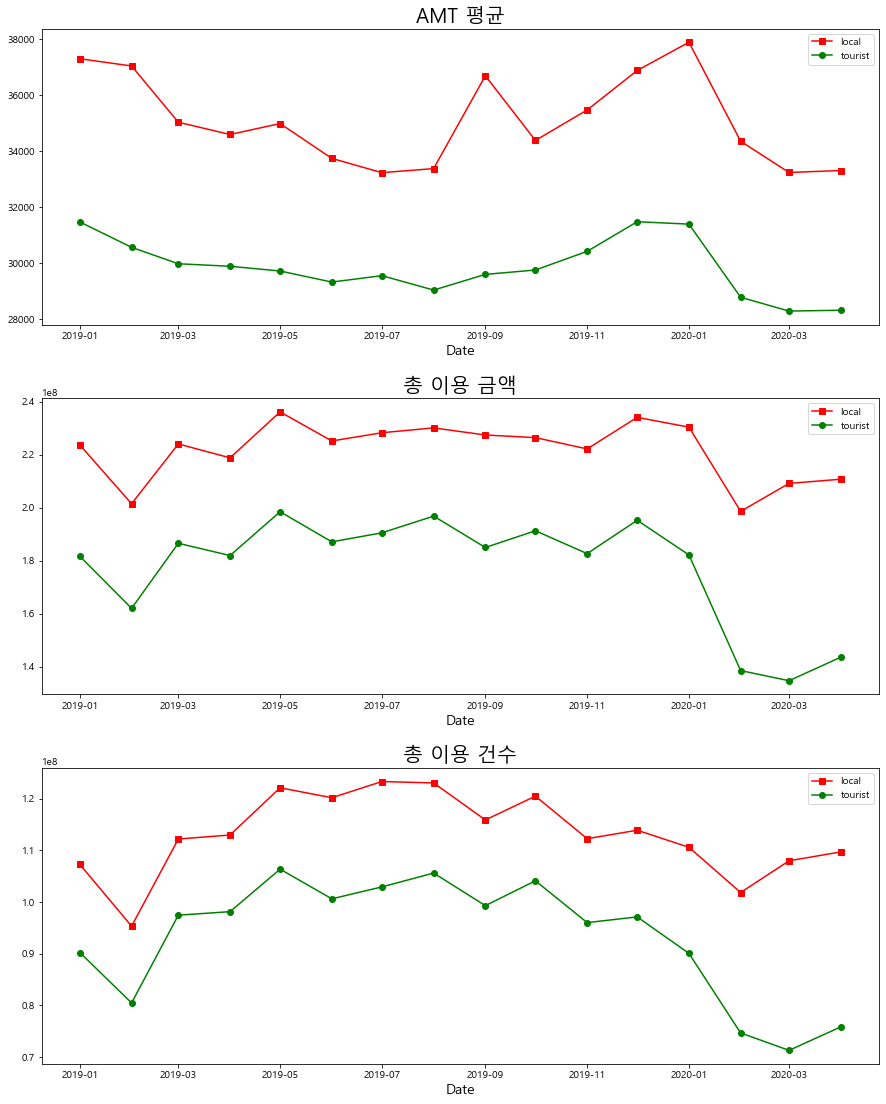

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(311)
plt.plot(index, ts.lcl_amt_mean, marker = 's', color = 'r')
plt.plot(index, ts.trst_amt_mean, marker = 'o', color = 'g')
plt.title('AMT 평균', fontsize = 20) 
plt.xlabel('Date', fontsize = 14)
plt.legend(['local', 'tourist'])

plt.subplot(312)
plt.plot(index, ts.lcl_amt, marker = 's', color = 'r')
plt.plot(index, ts.trst_amt, marker = 'o', color = 'g')
plt.title('총 이용 금액', fontsize = 20) 
plt.xlabel('Date', fontsize = 14)
plt.legend(['local', 'tourist'])

plt.subplot(313)
plt.plot(index, ts.lcl_cnt, marker = 's', color = 'r')
plt.plot(index, ts.trst_cnt, marker = 'o', color = 'g')
plt.title('총 이용 건수', fontsize = 20) 
plt.xlabel('Date', fontsize = 14)
plt.legend(['local', 'tourist'])

plt.subplots_adjust(top = 3, hspace = 0.25)
plt.show()

### 건당 이용 금액
<지역민>
- 2020년 1월 대비 3월에 대폭 감소
- 2019년 9월에서 갑자기 치솟음 ------> 분석이 필요해보임
- 2019년 12월이 높다가 코로나 때문에 1월부터 계속 하향세


<관광객>
- 2019년 12월이 높다가 코로나 때문에 1월부터 계속 하향세
- 2020년 3월이 최저치



### 총 이용 금액  
    금액에 차이는 있지만 매우 비슷한 양상을 보이다가 2020년 2월 이후 차이가 나타남

<지역민>
- 2019년 5월이 최고치
- 2019년 6월부터 2019년 11월까지 변화가 거의 없다

<관광객>
- 2020년 1월에서 2020년 2월사이에 가장 급하게 하향


### 총 이용 건수  
    금액에 차이는 있지만 매우 비슷한 양상을 보이다가 2020년 2월 이후 차이가 나타남
    
- 총 이용금액과 비슷한 추이


#### 시도별

In [18]:
# 도시 별 이용금액/이용건수 = 건 당 이용금액
lcl_amt_mean_sido = local.groupby(['CARD_SIDO_NM']).apply(lambda x : (x.AMT / x.CNT).mean()) 
trst_amt_mean_sido = tourist.groupby(['CARD_SIDO_NM']).apply(lambda x : (x.AMT / x.CNT).mean())

# 도시 별 이용금액(만 원 단위)
lcl_amt_sido = local.groupby(['CARD_SIDO_NM']).apply(lambda x : round(x.AMT.sum() / 10000,0)) 
trst_amt_sido = tourist.groupby(['CARD_SIDO_NM']).apply(lambda x : round(x.AMT.sum() / 10000,0))

# 도시 별 총 이용건수
lcl_cnt_sido = local.groupby(['CARD_SIDO_NM']).CNT.sum()
trst_cnt_sido = tourist.groupby(['CARD_SIDO_NM']).CNT.sum()

In [19]:
ts_sido = pd.concat([lcl_amt_mean_sido, trst_amt_mean_sido, lcl_amt_sido, trst_amt_sido, lcl_cnt_sido, trst_cnt_sido], axis = 1)
ts_sido.columns = ['lcl_amt_mean_sido', 'trst_amt_mean_sido', 'lcl_amt_sido', 'trst_amt_sido', 'lcl_cnt_sido', 'trst_cnt_sido']
ts_sido

,lcl_amt_mean_sido,trst_amt_mean_sido,lcl_amt_sido,trst_amt_sido,lcl_cnt_sido,trst_cnt_sido
CARD_SIDO_NM,,,,,,
강원,37070.497144,31540.536277,114961641.0,53311319.0,46555535,21523194
경기,33286.745225,27576.917824,913584088.0,596060044.0,476218918,269132464
경남,36816.903489,30400.772667,256951847.0,113255018.0,113868714,45165704
경북,35165.725614,30559.952572,196818185.0,96331901.0,82739771,37130360
광주,33600.130878,28525.129106,110395898.0,71249562.0,56330770,31883275
대구,31355.854926,25311.318397,187444831.0,130939789.0,102403016,70934336
대전,29438.562905,23510.239457,68762088.0,51014540.0,38800242,25861275
부산,32666.963797,30150.815672,220435230.0,252792379.0,125465669,115077436
서울,36327.516006,30516.761783,570720249.0,977046633.0,370289584,679885706


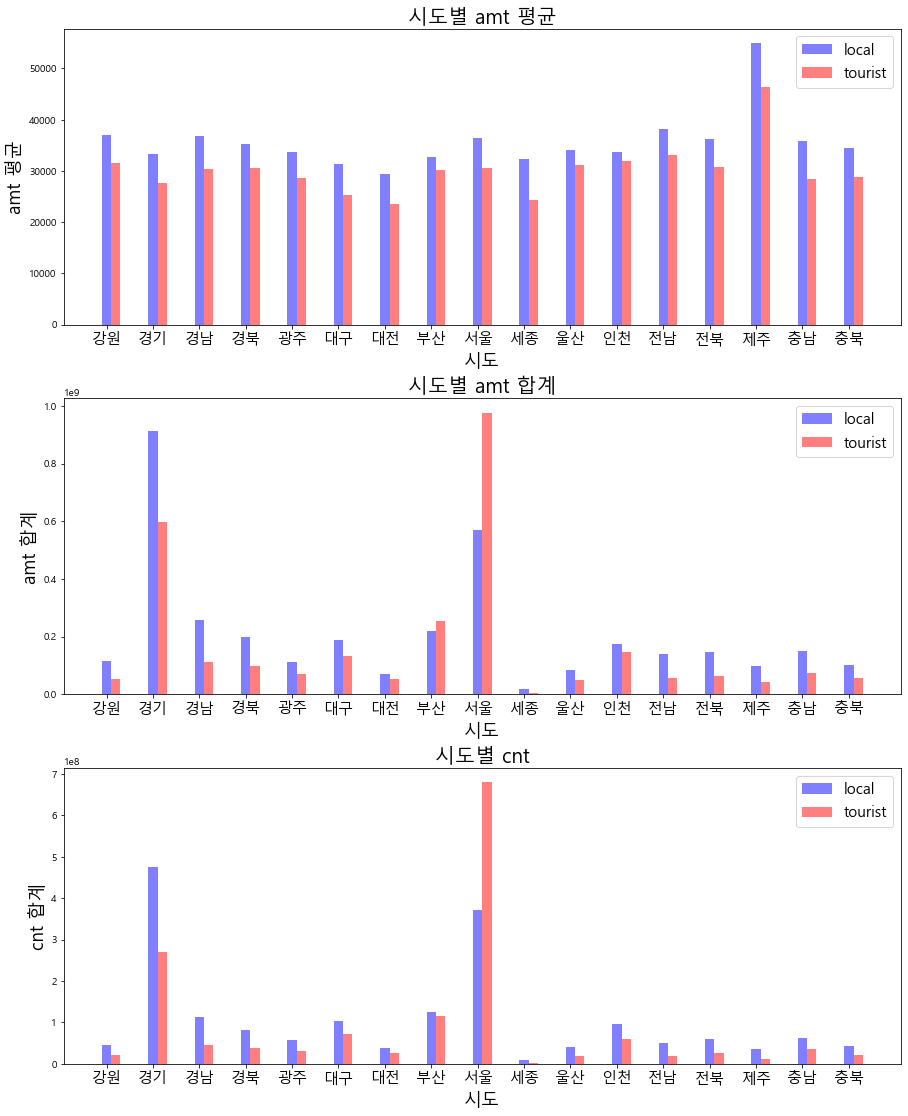

In [20]:
ts_sido.index
index = np.arange(len(ts_sido.index))

plt.figure(figsize=(15, 5))
plt.subplot(311)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_sido.lcl_amt_mean_sido, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width , ts_sido.trst_amt_mean_sido, bar_width, color='r', alpha=alpha)
plt.title('시도별 amt 평균', fontsize=20)
plt.ylabel('amt 평균', fontsize=18)
plt.xlabel('시도', fontsize=18)
plt.xticks(index, ts_sido.index, fontsize=15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize=15)

plt.subplot(312)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_sido.lcl_amt_sido, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width, ts_sido.trst_amt_sido, bar_width, color='r', alpha=alpha)
plt.title('시도별 amt 합계', fontsize=20)
plt.ylabel('amt 합계', fontsize=18)
plt.xlabel('시도', fontsize=18)
plt.xticks(index, ts_sido.index, fontsize=15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize=15)

plt.subplot(313)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_sido.lcl_cnt_sido, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width, ts_sido.trst_cnt_sido, bar_width, color='r', alpha=alpha)
plt.title('시도별 cnt', fontsize=20)
plt.ylabel('cnt 합계', fontsize=18)
plt.xlabel('시도', fontsize=18)
plt.xticks(index, ts_sido.index, fontsize=15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize=15)

plt.subplots_adjust(top = 3, hspace = 0.25)
plt.show()

### 건당 이용 금액
<지역민>
- 관광객보다 건당 이용 금액이 높다.
- 제주를 제외한 시도에서 모두 평탄하다.
- 심지어 제주마저 지역민이 높다

<관광객>
- 대전, 세종에서 매우 낮음

### 총 이용 금액
<지역민>
- 경기와 서울에서 가장 높다
- 세종에서 가장 낮다

<관광객>
- 서울은 거주자보다 관광객의 이용 금액이 높다


### 총 이용 건수    
- 총 이용금액과 비슷한 추이


#### 업종별

In [21]:
# 업종 별 이용금액/이용건수 = 건 당 이용금액
lcl_amt_mean_STD_CLSS = local.groupby(['STD_CLSS_NM']).apply(lambda x : (x.AMT / x.CNT).mean()) 
trst_amt_mean_STD_CLSS = tourist.groupby(['STD_CLSS_NM']).apply(lambda x : (x.AMT / x.CNT).mean())

# 업종 별 이용금액(만 원 단위)
lcl_amt_STD_CLSS = local.groupby(['STD_CLSS_NM']).apply(lambda x : round(x.AMT.sum() / 10000,0)) 
trst_amt_STD_CLSS = tourist.groupby(['STD_CLSS_NM']).apply(lambda x : round(x.AMT.sum() / 10000,0))

# 업종 별 총 이용건수
lcl_cnt_STD_CLSS = local.groupby(['STD_CLSS_NM']).CNT.sum()
trst_cnt_STD_CLSS = tourist.groupby(['STD_CLSS_NM']).CNT.sum()

In [22]:
ts_STD_CLSS = pd.concat([lcl_amt_mean_STD_CLSS, trst_amt_mean_STD_CLSS, lcl_amt_STD_CLSS, trst_amt_STD_CLSS, lcl_cnt_STD_CLSS, trst_cnt_STD_CLSS], axis = 1)
ts_STD_CLSS.columns = ['lcl_amt_mean_STD_CLSS', 'trst_amt_mean_STD_CLSS', 'lcl_amt_STD_CLSS', 'trst_amt_STD_CLSS', 'lcl_cnt_STD_CLSS', 'trst_cnt_STD_CLSS']
ts_STD_CLSS

,lcl_amt_mean_STD_CLSS,trst_amt_mean_STD_CLSS,lcl_amt_STD_CLSS,trst_amt_STD_CLSS,lcl_cnt_STD_CLSS,trst_cnt_STD_CLSS
STD_CLSS_NM,,,,,,
건강보조식품 소매업,114107.605535,90302.724753,7225883.0,3870162.0,697550,463268
골프장 운영업,93007.532293,129044.251347,8050513.0,57051538.0,877432,4512798
과실 및 채소 소매업,26507.463495,35940.231095,40181115.0,26384554.0,17334051,9242857
관광 민예품 및 선물용품 소매업,40546.063291,24122.797318,513037.0,1059480.0,150265,463415
그외 기타 분류안된 오락관련 서비스업,26678.353058,31469.648232,1058.0,2748.0,424,1020
그외 기타 스포츠시설 운영업,34192.469067,19131.853297,219949.0,58266.0,103087,38551
그외 기타 종합 소매업,50249.034724,51256.287948,36813918.0,72908691.0,9770956,13089210
기타 대형 종합 소매업,27988.356382,38224.498305,451226283.0,322620015.0,155495573,88814972
기타 수상오락 서비스업,27614.127001,37716.405034,76596.0,100904.0,27768,25725


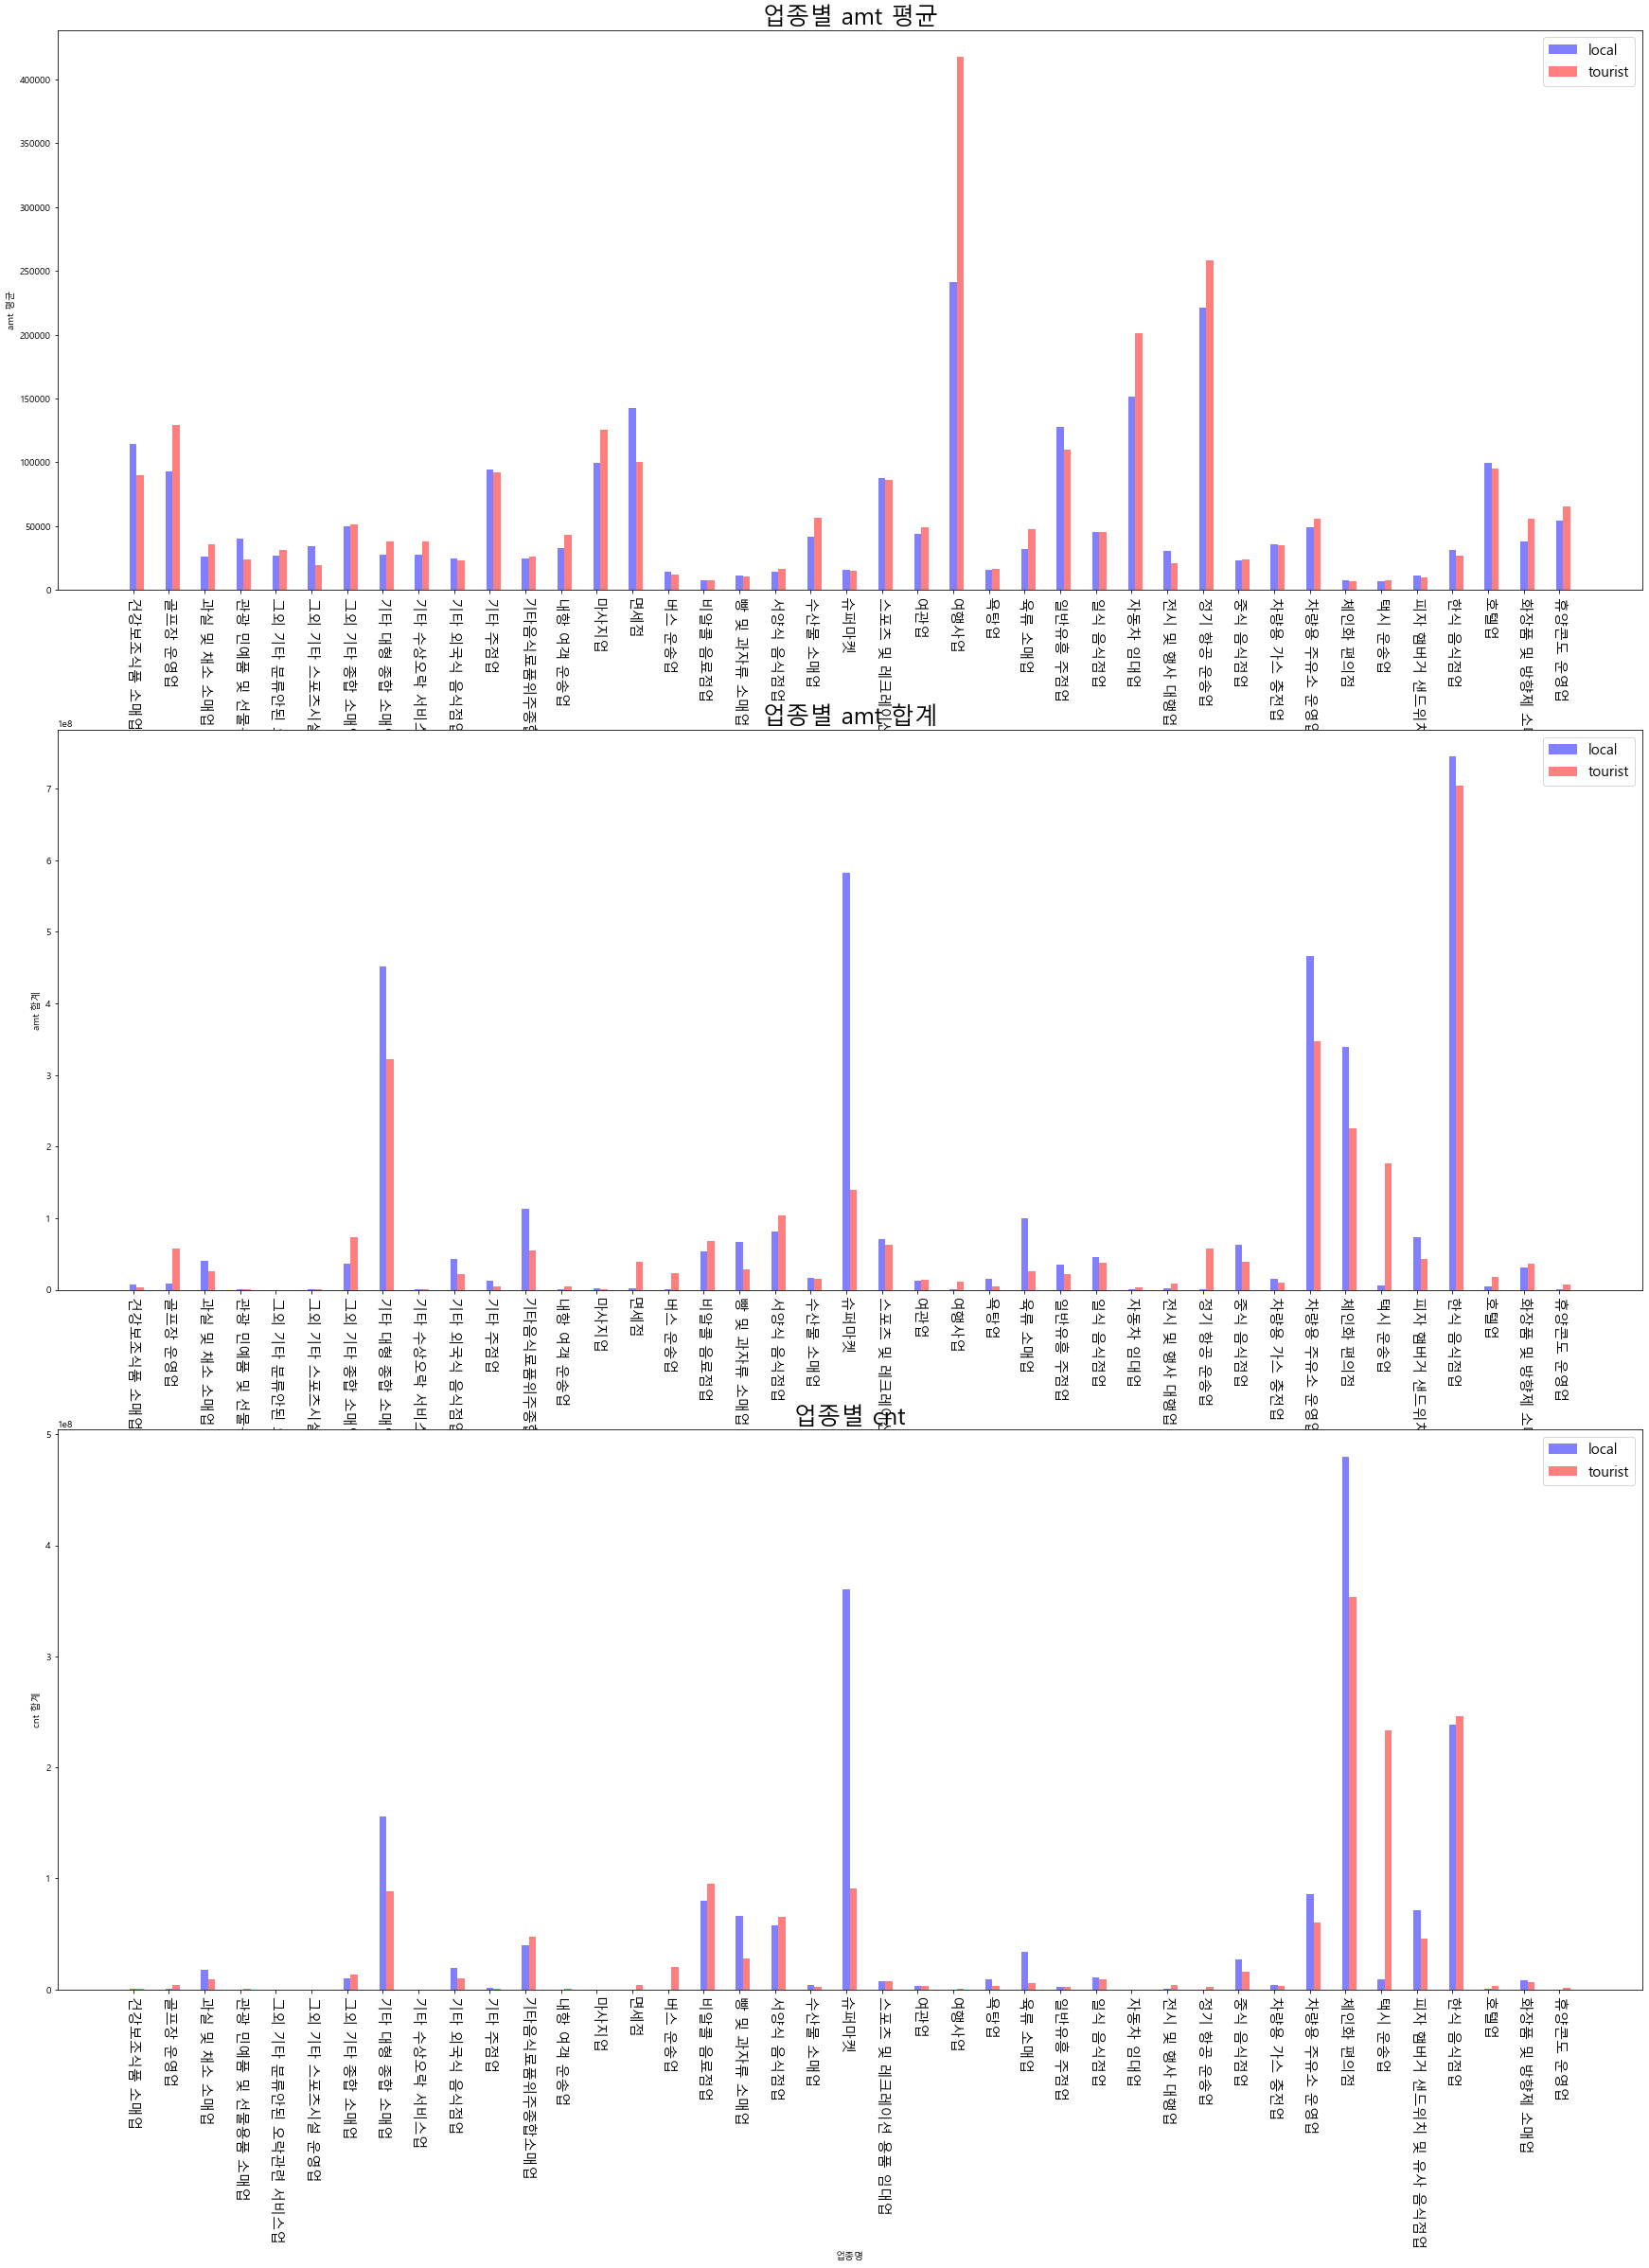

In [23]:
index = np.arange(len(ts_STD_CLSS.index))

plt.figure(figsize=(30, 10))
plt.subplot(311)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_STD_CLSS.lcl_amt_mean_STD_CLSS, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width , ts_STD_CLSS.trst_amt_mean_STD_CLSS, bar_width, color='r', alpha=alpha)
plt.title('업종별 amt 평균', fontsize = 25)
plt.ylabel('amt 평균', fontsize = 10)
plt.xlabel('업종명', fontsize = 10)
plt.xticks(index, ts_STD_CLSS.index, fontsize = 15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize = 15)
plt.xticks(rotation = -90)

plt.subplot(312)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_STD_CLSS.lcl_amt_STD_CLSS, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width, ts_STD_CLSS.trst_amt_STD_CLSS, bar_width, color='r', alpha=alpha)
plt.title('업종별 amt 합계', fontsize=25)
plt.ylabel('amt 합계', fontsize=10)
plt.xlabel('업종명', fontsize=10)
plt.xticks(index, ts_STD_CLSS.index, fontsize=15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize=15)
plt.xticks(rotation = -90)

plt.subplot(313)
bar_width = 0.2
alpha = 0.5
p1 = plt.bar(index, ts_STD_CLSS.lcl_cnt_STD_CLSS, bar_width, color='b', alpha=alpha)
p2 = plt.bar(index + bar_width, ts_STD_CLSS.trst_cnt_STD_CLSS, bar_width, color='r', alpha=alpha)
plt.title('업종별 cnt', fontsize=25)
plt.ylabel('cnt 합계', fontsize=10)
plt.xlabel('업종명', fontsize=10)
plt.xticks(index, ts_STD_CLSS.index, fontsize=15)
plt.legend((p1[0], p2[0]), ('local', 'tourist'), fontsize=15)
plt.xticks(rotation = -90)

plt.subplots_adjust(top = 3, hspace = 0.25)
plt.show()

### 건당 이용 금액
<지역민>
- 관광객보다 건당 이용 금액이 높다.
- 제주를 제외한 시도에서 모두 평탄하다.
- 심지어 제주마저 지역민이 높다

<관광객>
- 대전, 세종에서 매우 낮음

### 총 이용 금액
<지역민>
- 경기와 서울에서 가장 높다
- 세종에서 가장 낮다

<관광객>
- 서울은 거주자보다 관광객의 이용 금액이 높다


### 총 이용 건수    
- 총 이용금액과 비슷한 추이


In [39]:
data.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,LOCAL_TOUR
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1,1
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1,1
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1,1
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1,1
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1,1


In [44]:
data.to_csv('data/train.csv')

In [46]:
data['LOCAL_TOUR'] = (data['CARD_CCG_NM'] == data['HOM_CCG_NM']) * 1

In [47]:
data.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,LOCAL_TOUR
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5,1
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6,1
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5,1
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7,1
1350321,202004,충북,충주시,휴양콘도 운영업,충북,충주시,60s,2,5,3,227000,4,1


In [49]:
#그룹으로 묶기
test = data[["REG_YYMM","CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "LOCAL_TOUR", 'AMT']].groupby(["REG_YYMM","CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "LOCAL_TOUR"]).sum()

In [94]:
len(test)

226518

In [96]:
df_test = pd.DataFrame(columns=["REG_YYMM","CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "LOCAL_TOUR", "AMT"])
df_test

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,SEX_CTGO_CD,LOCAL_TOUR,AMT


In [108]:
test = test.reset_index()
test

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,SEX_CTGO_CD,LOCAL_TOUR,AMT
0,201901,강원,건강보조식품 소매업,20s,1,1,311200
1,201901,강원,건강보조식품 소매업,30s,1,1,5169295
2,201901,강원,건강보조식품 소매업,30s,2,0,389000
3,201901,강원,건강보조식품 소매업,30s,2,1,8229550
4,201901,강원,건강보조식품 소매업,40s,1,1,8059285
...,...,...,...,...,...,...,...
226513,202004,충북,휴양콘도 운영업,50s,1,0,570000
226514,202004,충북,휴양콘도 운영업,50s,1,1,720500
226515,202004,충북,휴양콘도 운영업,50s,2,0,256900
226516,202004,충북,휴양콘도 운영업,60s,2,0,504700


In [113]:
test['REG_YYMM'] = test['REG_YYMM'].astype('str')
test['SEX_CTGO_CD'] = test['SEX_CTGO_CD'] - 1
test

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,SEX_CTGO_CD,LOCAL_TOUR,AMT
0,201901,강원,건강보조식품 소매업,20s,0,1,311200
1,201901,강원,건강보조식품 소매업,30s,0,1,5169295
2,201901,강원,건강보조식품 소매업,30s,1,0,389000
3,201901,강원,건강보조식품 소매업,30s,1,1,8229550
4,201901,강원,건강보조식품 소매업,40s,0,1,8059285
...,...,...,...,...,...,...,...
226513,202004,충북,휴양콘도 운영업,50s,0,0,570000
226514,202004,충북,휴양콘도 운영업,50s,0,1,720500
226515,202004,충북,휴양콘도 운영업,50s,1,0,256900
226516,202004,충북,휴양콘도 운영업,60s,1,0,504700


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226518 entries, 0 to 226517
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      226518 non-null  object
 1   CARD_SIDO_NM  226518 non-null  object
 2   STD_CLSS_NM   226518 non-null  object
 3   AGE           226518 non-null  object
 4   SEX_CTGO_CD   226518 non-null  int64 
 5   LOCAL_TOUR    226518 non-null  int64 
 6   AMT           226518 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 12.1+ MB


In [ ]:
#결측된 데이터프레임 생성
empty_df = pd.DataFrame(columns=list(test.columns))
empty_df

for YYMM in test['REG_YYMM'].unique():
    append_list = ['201901', '강원', '건강보조식품 소매업', '20s', 0, 0, 0]
    append_list[0] = YYMM
    for SIDO in test['CARD_SIDO_NM'].unique():
        append_list[1] = SIDO
        for STD in test['STD_CLSS_NM'].unique():
            append_list[2] = STD
            for AGE in test['AGE'].unique():
                append_list[3] = AGE
                for SEX in test['SEX_CTGO_CD'].unique():
                    append_list[4] = SEX
                    for LOCAL_TOUR in test['LOCAL_TOUR'].unique():
                        append_list[5] = LOCAL_TOUR
                        append_list[6] = 0
#                         print("if전: ", append_list)
                        if test[ (test['REG_YYMM']==YYMM) &  (test['CARD_SIDO_NM']==SIDO) & (test['STD_CLSS_NM']==STD) & (test['AGE']==AGE) & (test['SEX_CTGO_CD']==SEX) & (test['LOCAL_TOUR']==LOCAL_TOUR)].empty:
                            print("if후: ", append_list)
                            test = test.append(dict(zip(list(empty_df.columns), append_list)), ignore_index=True)
                            #display(empty_df)

if후:  ['201901', '강원', '건강보조식품 소매업', '20s', 0, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '20s', 1, 1, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '20s', 1, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '30s', 0, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '40s', 0, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '50s', 1, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '70s', 0, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '10s', 0, 1, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '10s', 1, 1, 0]
if후:  ['201901', '강원', '건강보조식품 소매업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '골프장 운영업', '10s', 1, 1, 0]
if후:  ['201901', '강원', '과실 및 채소 소매업', '10s', 0, 1, 0]
if후:  ['201901', '강원', '과실 및 채소 소매업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '과실 및 채소 소매업', '10s', 1, 1, 0]
if후:  ['201901', '강원', '과실 및 채소 소매업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '관광 민예품 및 선물용품 소매업', '70s', 0, 0, 0]
if후:  ['201901', '강원', '관광 민예품 및 선물용품 소매업', '10s', 0, 1, 0]
if후:  ['201901', '강원', '관광 민예품 

if후:  ['201901', '강원', '버스 운송업', '50s', 1, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '60s', 0, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '60s', 1, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '70s', 0, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '70s', 0, 0, 0]
if후:  ['201901', '강원', '버스 운송업', '70s', 1, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '70s', 1, 0, 0]
if후:  ['201901', '강원', '버스 운송업', '10s', 0, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '버스 운송업', '10s', 1, 1, 0]
if후:  ['201901', '강원', '버스 운송업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '비알콜 음료점업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '빵 및 과자류 소매업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '빵 및 과자류 소매업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '서양식 음식점업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '서양식 음식점업', '10s', 1, 0, 0]
if후:  ['201901', '강원', '수산물 소매업', '10s', 0, 1, 0]
if후:  ['201901', '강원', '수산물 소매업', '10s', 0, 0, 0]
if후:  ['201901', '강원', '수산물 소매업', '10s', 1, 1, 0]
if후:  ['201901', '강원', '수산물 소매업', '10s', 1, 0, 0]


if후:  ['201901', '강원', '정기 항공 운송업', '30s', 0, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '30s', 0, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '30s', 1, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '30s', 1, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '40s', 0, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '40s', 0, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '40s', 1, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '40s', 1, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '50s', 0, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '50s', 0, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '50s', 1, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '50s', 1, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '60s', 0, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '60s', 0, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '60s', 1, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '60s', 1, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '70s', 0, 1, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '70s', 0, 0, 0]
if후:  ['201901', '강원', '정기 항공 운송업', '70s', 1, 1, 0]
if후:  ['2019

if후:  ['201901', '경기', '차량용 주유소 운영업', '10s', 1, 1, 0]
if후:  ['201901', '경기', '차량용 주유소 운영업', '10s', 1, 0, 0]
if후:  ['201901', '경기', '택시 운송업', '70s', 0, 0, 0]
if후:  ['201901', '경기', '택시 운송업', '10s', 0, 0, 0]
if후:  ['201901', '경기', '택시 운송업', '10s', 1, 0, 0]
if후:  ['201901', '경기', '호텔업', '10s', 0, 1, 0]
if후:  ['201901', '경기', '호텔업', '10s', 0, 0, 0]
if후:  ['201901', '경기', '호텔업', '10s', 1, 1, 0]
if후:  ['201901', '경기', '호텔업', '10s', 1, 0, 0]
if후:  ['201901', '경기', '휴양콘도 운영업', '70s', 1, 0, 0]
if후:  ['201901', '경기', '휴양콘도 운영업', '10s', 0, 1, 0]
if후:  ['201901', '경기', '휴양콘도 운영업', '10s', 0, 0, 0]
if후:  ['201901', '경기', '휴양콘도 운영업', '10s', 1, 1, 0]
if후:  ['201901', '경기', '휴양콘도 운영업', '10s', 1, 0, 0]
if후:  ['201901', '경기', '그외 기타 분류안된 오락관련 서비스업', '20s', 0, 1, 0]
if후:  ['201901', '경기', '그외 기타 분류안된 오락관련 서비스업', '20s', 0, 0, 0]
if후:  ['201901', '경기', '그외 기타 분류안된 오락관련 서비스업', '20s', 1, 1, 0]
if후:  ['201901', '경기', '그외 기타 분류안된 오락관련 서비스업', '20s', 1, 0, 0]
if후:  ['201901', '경기', '그외 기타 분류안된 오락관련 서비스업', '30s', 

if후:  ['201901', '경남', '내항 여객 운송업', '10s', 1, 0, 0]
if후:  ['201901', '경남', '마사지업', '20s', 1, 1, 0]
if후:  ['201901', '경남', '마사지업', '20s', 1, 0, 0]
if후:  ['201901', '경남', '마사지업', '30s', 1, 1, 0]
if후:  ['201901', '경남', '마사지업', '40s', 1, 0, 0]
if후:  ['201901', '경남', '마사지업', '60s', 0, 1, 0]
if후:  ['201901', '경남', '마사지업', '60s', 0, 0, 0]
if후:  ['201901', '경남', '마사지업', '60s', 1, 1, 0]
if후:  ['201901', '경남', '마사지업', '60s', 1, 0, 0]
if후:  ['201901', '경남', '마사지업', '70s', 0, 1, 0]
if후:  ['201901', '경남', '마사지업', '70s', 0, 0, 0]
if후:  ['201901', '경남', '마사지업', '70s', 1, 1, 0]
if후:  ['201901', '경남', '마사지업', '70s', 1, 0, 0]
if후:  ['201901', '경남', '마사지업', '10s', 0, 1, 0]
if후:  ['201901', '경남', '마사지업', '10s', 0, 0, 0]
if후:  ['201901', '경남', '마사지업', '10s', 1, 1, 0]
if후:  ['201901', '경남', '마사지업', '10s', 1, 0, 0]
if후:  ['201901', '경남', '면세점', '20s', 0, 1, 0]
if후:  ['201901', '경남', '면세점', '20s', 0, 0, 0]
if후:  ['201901', '경남', '면세점', '20s', 1, 1, 0]
if후:  ['201901', '경남', '면세점', '20s', 1, 0, 0]
if후:  ['2019

if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '50s', 1, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '50s', 1, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '60s', 0, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '60s', 0, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '60s', 1, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '60s', 1, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '70s', 0, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '70s', 0, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '70s', 1, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '70s', 1, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '10s', 0, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '10s', 0, 0, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '10s', 1, 1, 0]
if후:  ['201901', '경남', '그외 기타 분류안된 오락관련 서비스업', '10s', 1, 0, 0]
if후:  ['201901', '경남', '정기 항공 운송업', '20s', 0, 1, 0]
if후:  ['201901', '경남', '정기 항공 운송업', '20s', 0, 0, 0]
if후:  ['201901

if후:  ['201901', '경북', '면세점', '20s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '30s', 0, 1, 0]
if후:  ['201901', '경북', '면세점', '30s', 0, 0, 0]
if후:  ['201901', '경북', '면세점', '30s', 1, 1, 0]
if후:  ['201901', '경북', '면세점', '30s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '40s', 0, 1, 0]
if후:  ['201901', '경북', '면세점', '40s', 0, 0, 0]
if후:  ['201901', '경북', '면세점', '40s', 1, 1, 0]
if후:  ['201901', '경북', '면세점', '40s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '50s', 0, 1, 0]
if후:  ['201901', '경북', '면세점', '50s', 0, 0, 0]
if후:  ['201901', '경북', '면세점', '50s', 1, 1, 0]
if후:  ['201901', '경북', '면세점', '50s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '60s', 0, 1, 0]
if후:  ['201901', '경북', '면세점', '60s', 0, 0, 0]
if후:  ['201901', '경북', '면세점', '60s', 1, 1, 0]
if후:  ['201901', '경북', '면세점', '60s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '70s', 0, 1, 0]
if후:  ['201901', '경북', '면세점', '70s', 0, 0, 0]
if후:  ['201901', '경북', '면세점', '70s', 1, 1, 0]
if후:  ['201901', '경북', '면세점', '70s', 1, 0, 0]
if후:  ['201901', '경북', '면세점', '10s

if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '20s', 0, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '20s', 0, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '20s', 1, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '20s', 1, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '30s', 0, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '30s', 0, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '30s', 1, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '30s', 1, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '40s', 0, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '40s', 1, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '40s', 1, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '50s', 0, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '50s', 0, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '50s', 1, 1, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '50s', 1, 0, 0]
if후:  ['201901', '경북', '그외 기타 분류안된 오락관련 서비스업', '60s', 0

if후:  ['201901', '광주', '마사지업', '20s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '20s', 1, 0, 0]
if후:  ['201901', '광주', '마사지업', '30s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '30s', 1, 0, 0]
if후:  ['201901', '광주', '마사지업', '40s', 1, 0, 0]
if후:  ['201901', '광주', '마사지업', '50s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '50s', 1, 0, 0]
if후:  ['201901', '광주', '마사지업', '60s', 0, 0, 0]
if후:  ['201901', '광주', '마사지업', '60s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '70s', 0, 1, 0]
if후:  ['201901', '광주', '마사지업', '70s', 0, 0, 0]
if후:  ['201901', '광주', '마사지업', '70s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '10s', 0, 1, 0]
if후:  ['201901', '광주', '마사지업', '10s', 0, 0, 0]
if후:  ['201901', '광주', '마사지업', '10s', 1, 1, 0]
if후:  ['201901', '광주', '마사지업', '10s', 1, 0, 0]
if후:  ['201901', '광주', '면세점', '20s', 0, 1, 0]
if후:  ['201901', '광주', '면세점', '20s', 0, 0, 0]
if후:  ['201901', '광주', '면세점', '20s', 1, 1, 0]
if후:  ['201901', '광주', '면세점', '20s', 1, 0, 0]
if후:  ['201901', '광주', '면세점', '30s', 0, 1, 0]
if후:  ['201901', '

if후:  ['201901', '광주', '택시 운송업', '60s', 1, 0, 0]
if후:  ['201901', '광주', '택시 운송업', '70s', 0, 1, 0]
if후:  ['201901', '광주', '택시 운송업', '70s', 0, 0, 0]
if후:  ['201901', '광주', '택시 운송업', '70s', 1, 1, 0]
if후:  ['201901', '광주', '택시 운송업', '70s', 1, 0, 0]
if후:  ['201901', '광주', '택시 운송업', '10s', 0, 1, 0]
if후:  ['201901', '광주', '택시 운송업', '10s', 0, 0, 0]
if후:  ['201901', '광주', '택시 운송업', '10s', 1, 1, 0]
if후:  ['201901', '광주', '택시 운송업', '10s', 1, 0, 0]
if후:  ['201901', '광주', '호텔업', '20s', 0, 1, 0]
if후:  ['201901', '광주', '호텔업', '20s', 0, 0, 0]
if후:  ['201901', '광주', '호텔업', '20s', 1, 1, 0]
if후:  ['201901', '광주', '호텔업', '60s', 1, 0, 0]
if후:  ['201901', '광주', '호텔업', '70s', 0, 1, 0]
if후:  ['201901', '광주', '호텔업', '70s', 0, 0, 0]
if후:  ['201901', '광주', '호텔업', '70s', 1, 1, 0]
if후:  ['201901', '광주', '호텔업', '70s', 1, 0, 0]
if후:  ['201901', '광주', '호텔업', '10s', 0, 1, 0]
if후:  ['201901', '광주', '호텔업', '10s', 0, 0, 0]
if후:  ['201901', '광주', '호텔업', '10s', 1, 1, 0]
if후:  ['201901', '광주', '호텔업', '10s', 1, 0, 0]
if후:  [

if후:  ['201901', '대구', '기타 수상오락 서비스업', '60s', 1, 0, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '70s', 0, 1, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '70s', 0, 0, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '70s', 1, 1, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '70s', 1, 0, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '10s', 0, 1, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '10s', 0, 0, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '10s', 1, 1, 0]
if후:  ['201901', '대구', '기타 수상오락 서비스업', '10s', 1, 0, 0]
if후:  ['201901', '대구', '기타 외국식 음식점업', '10s', 0, 0, 0]
if후:  ['201901', '대구', '기타 외국식 음식점업', '10s', 1, 0, 0]
if후:  ['201901', '대구', '기타 주점업', '70s', 0, 0, 0]
if후:  ['201901', '대구', '기타 주점업', '70s', 1, 0, 0]
if후:  ['201901', '대구', '기타 주점업', '10s', 0, 1, 0]
if후:  ['201901', '대구', '기타 주점업', '10s', 0, 0, 0]
if후:  ['201901', '대구', '기타 주점업', '10s', 1, 1, 0]
if후:  ['201901', '대구', '기타 주점업', '10s', 1, 0, 0]
